Data Shape: (400, 4096)
Target Shape: (400,)
Hidden count: 400
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Iteration 4000


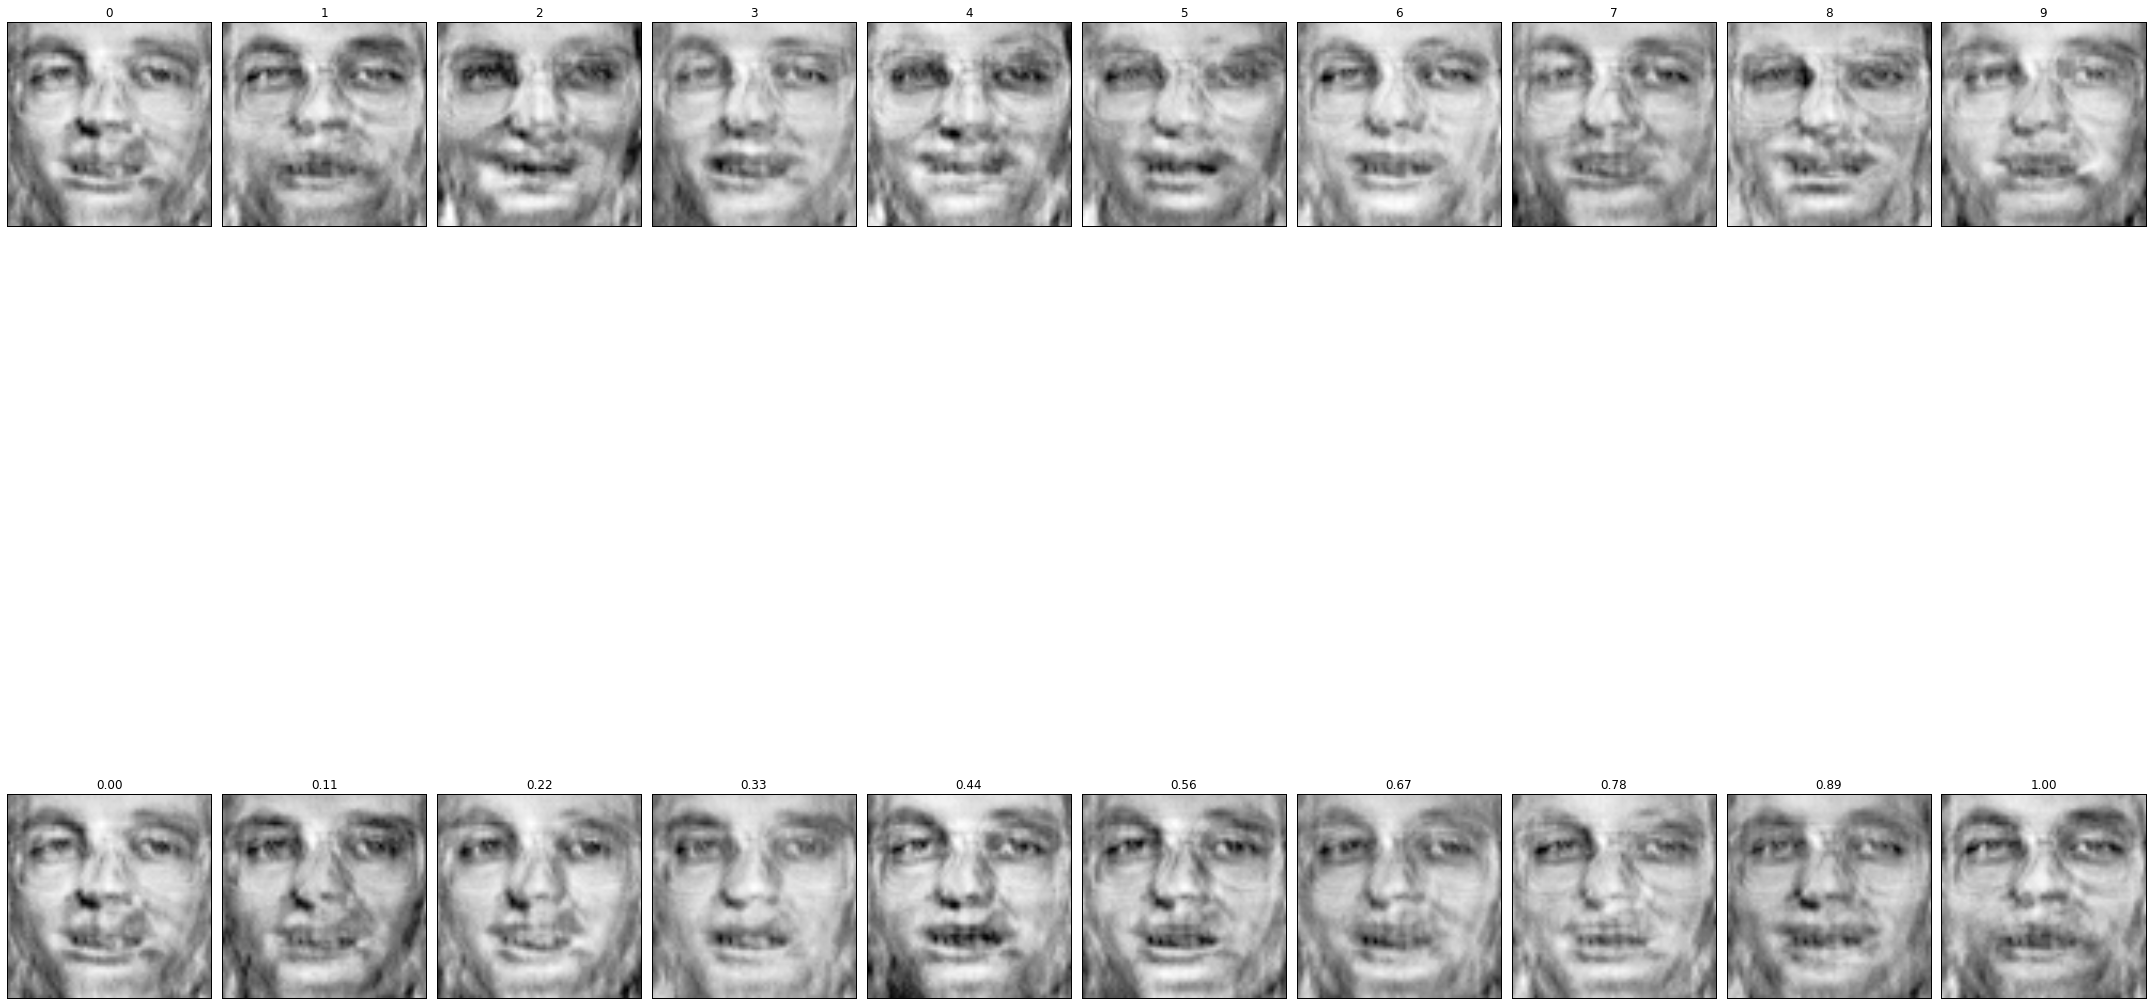

Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Iteration 8000


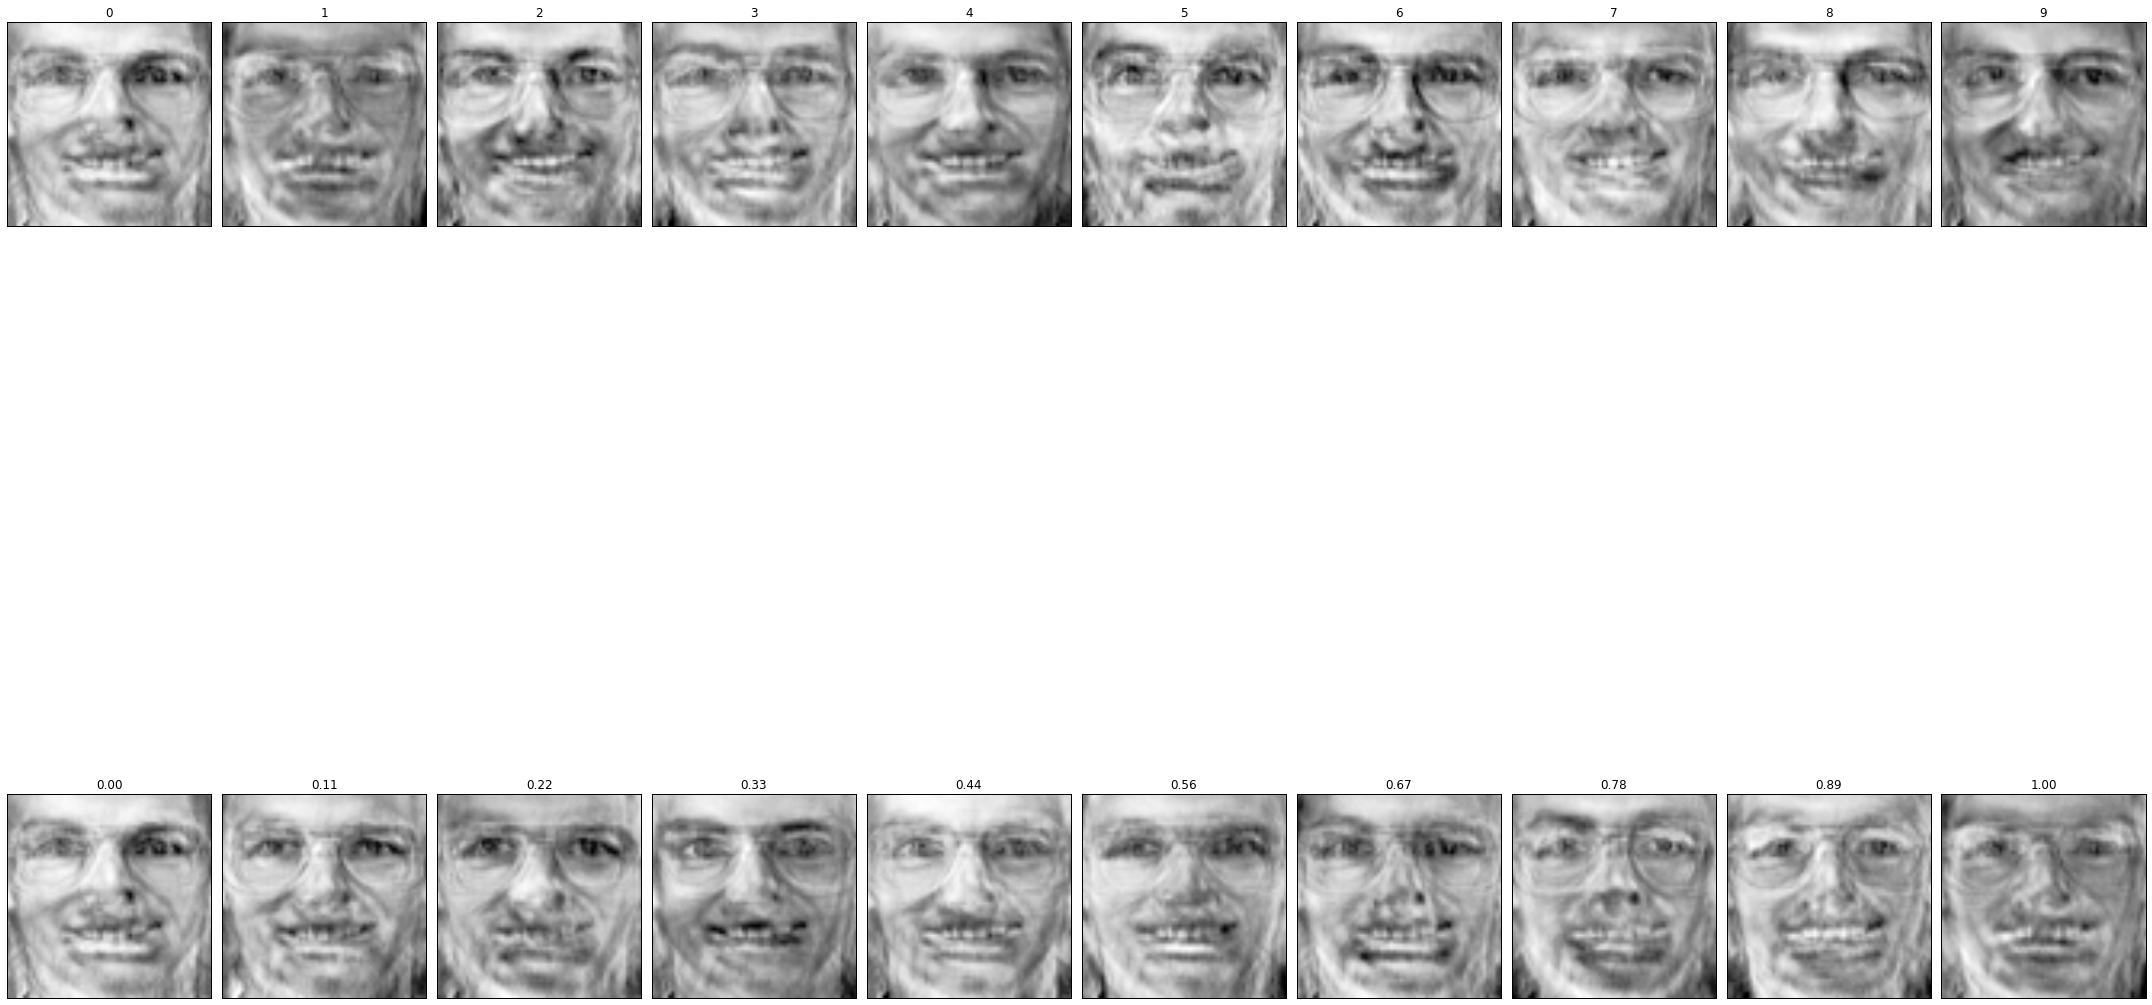

Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Iteration 12000


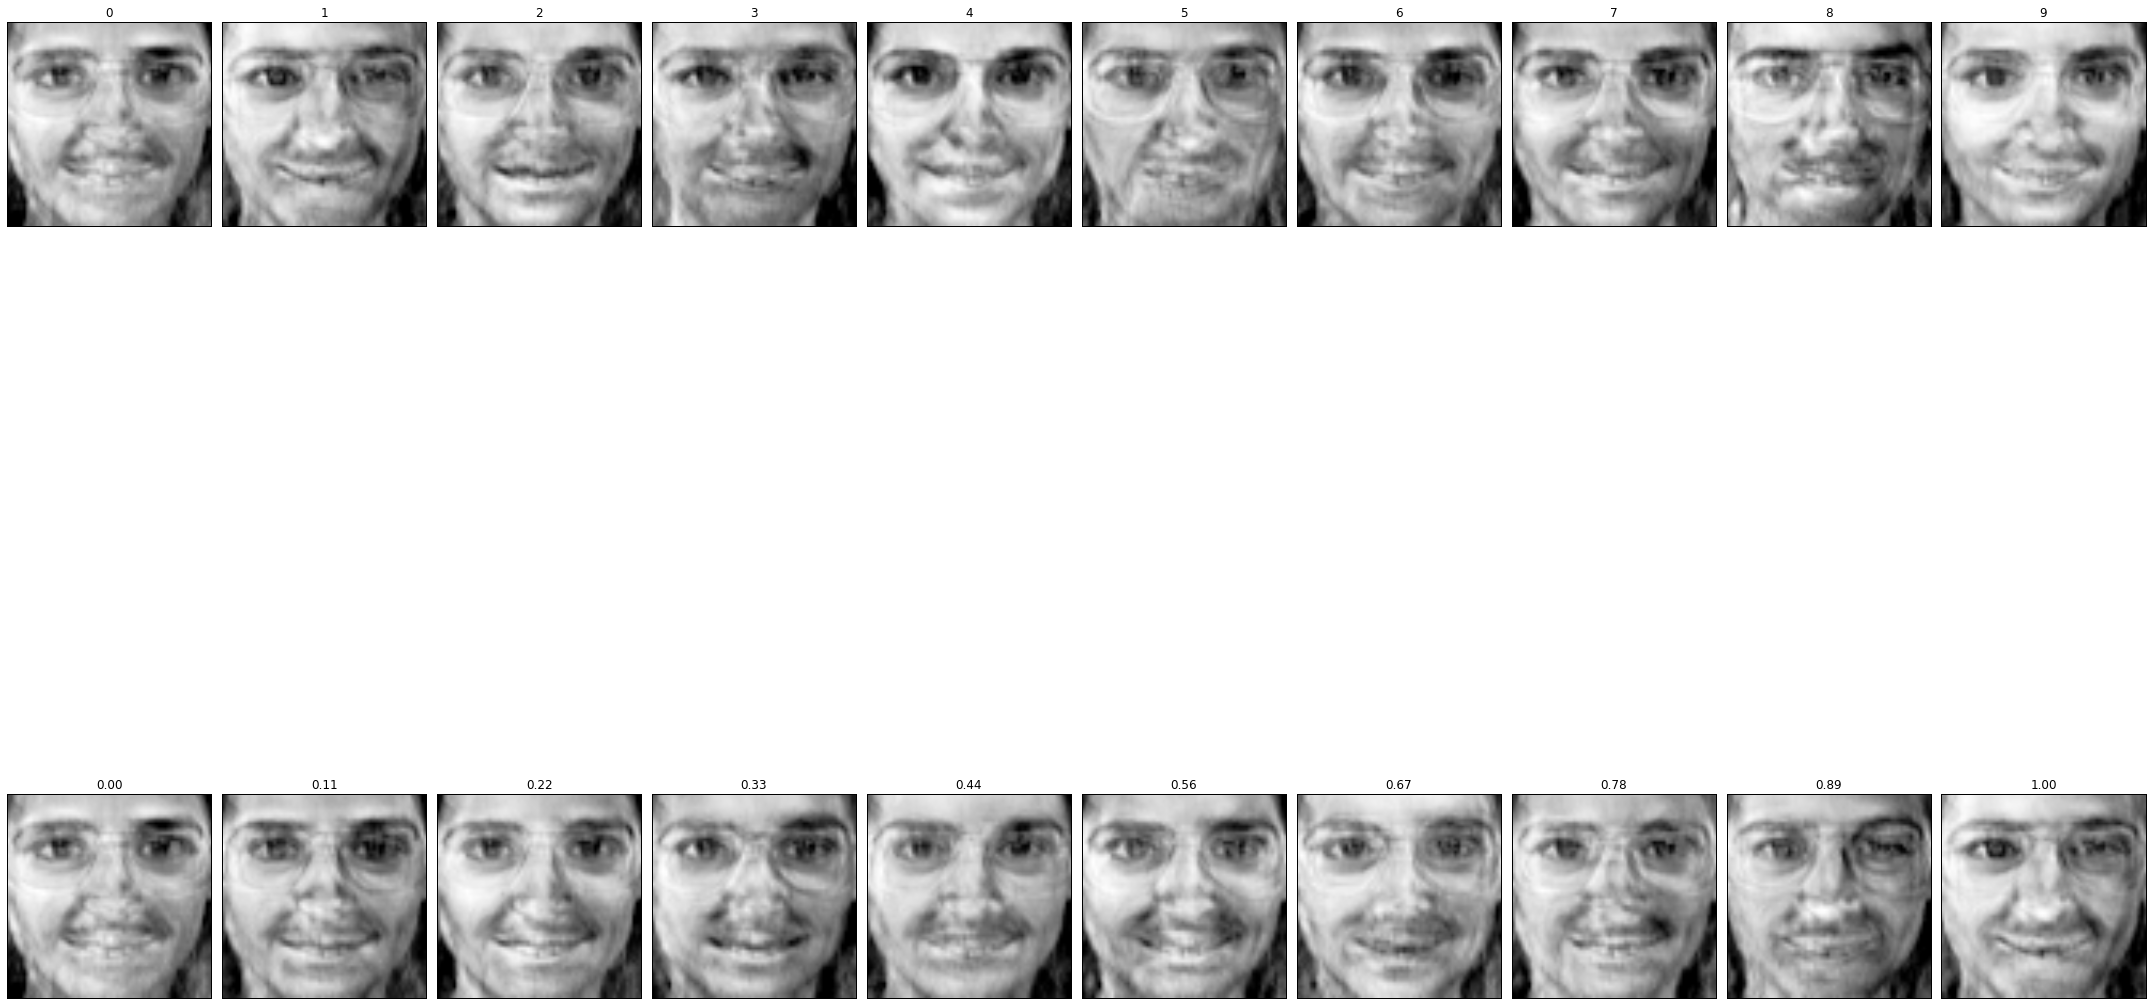

Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Iteration 16000


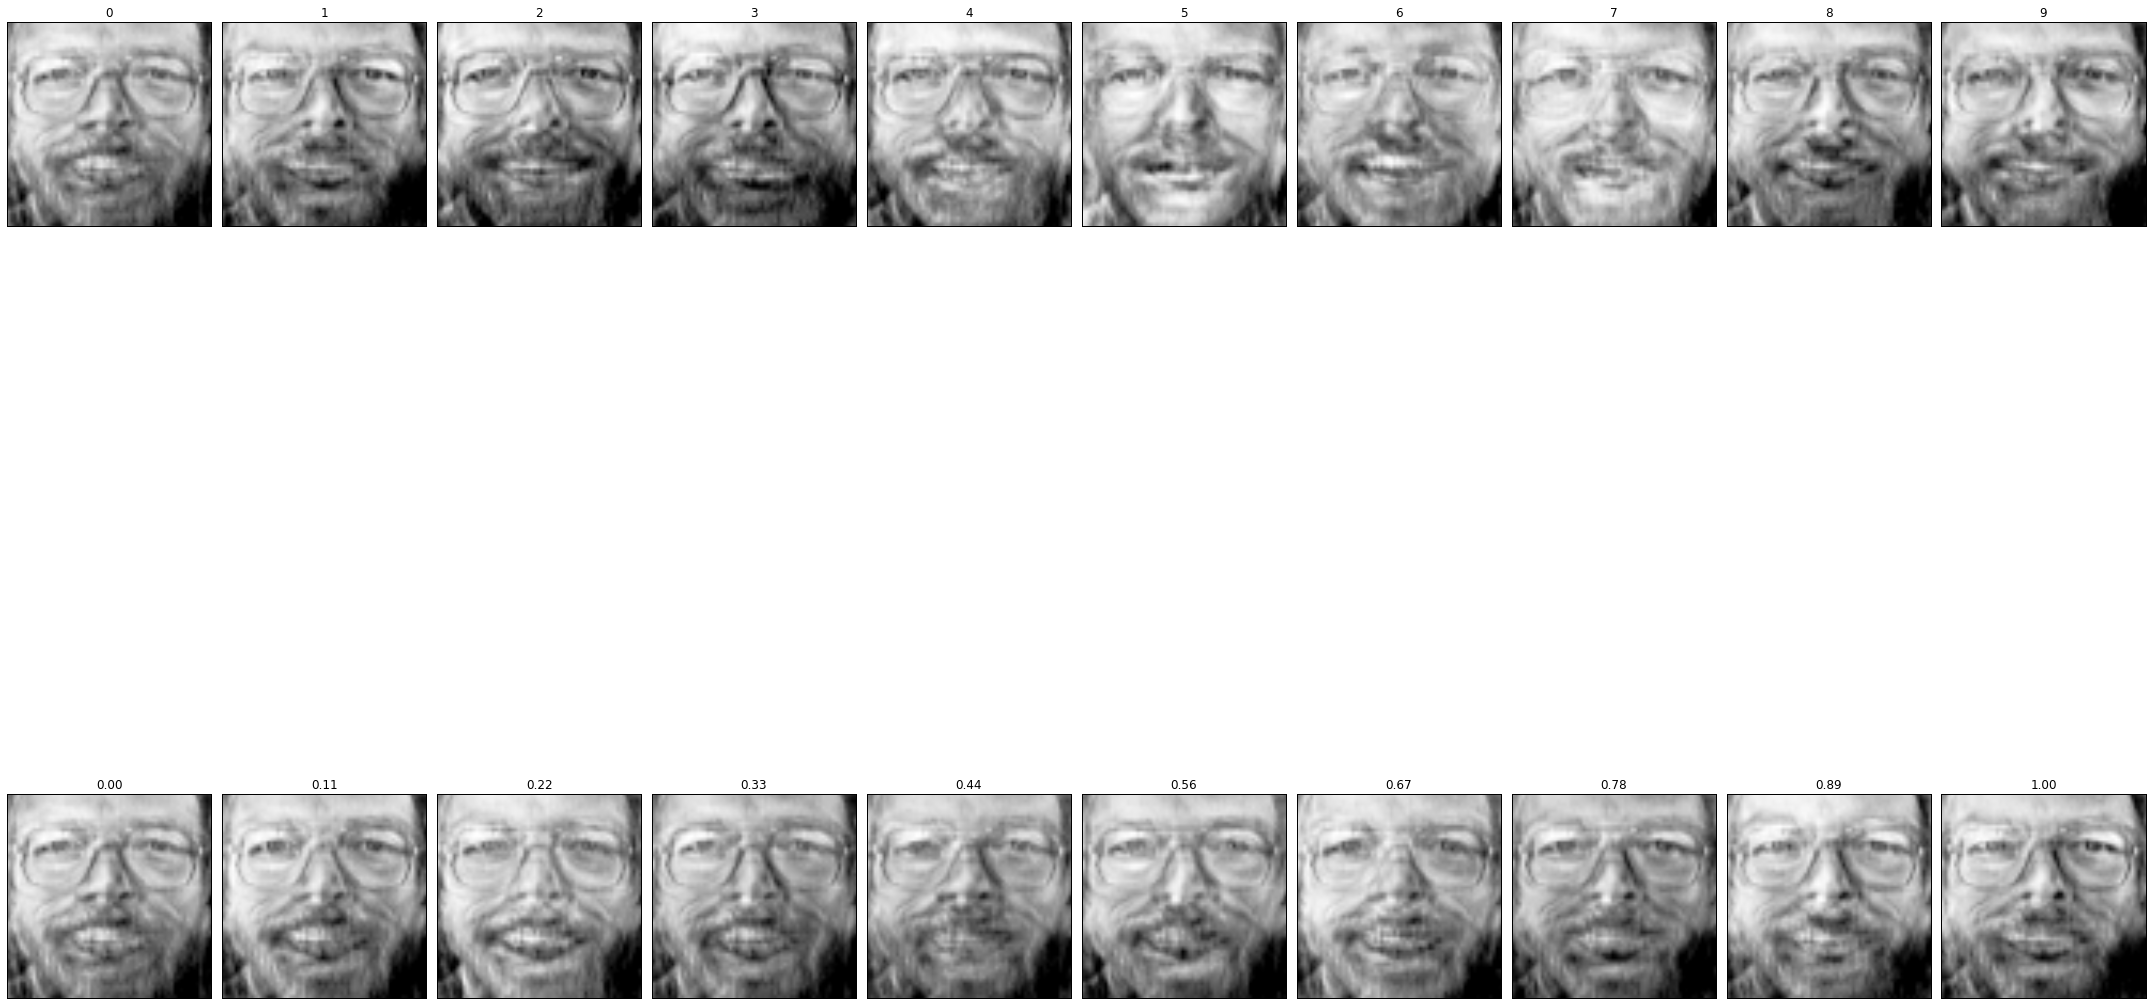

Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
Iteration 20000


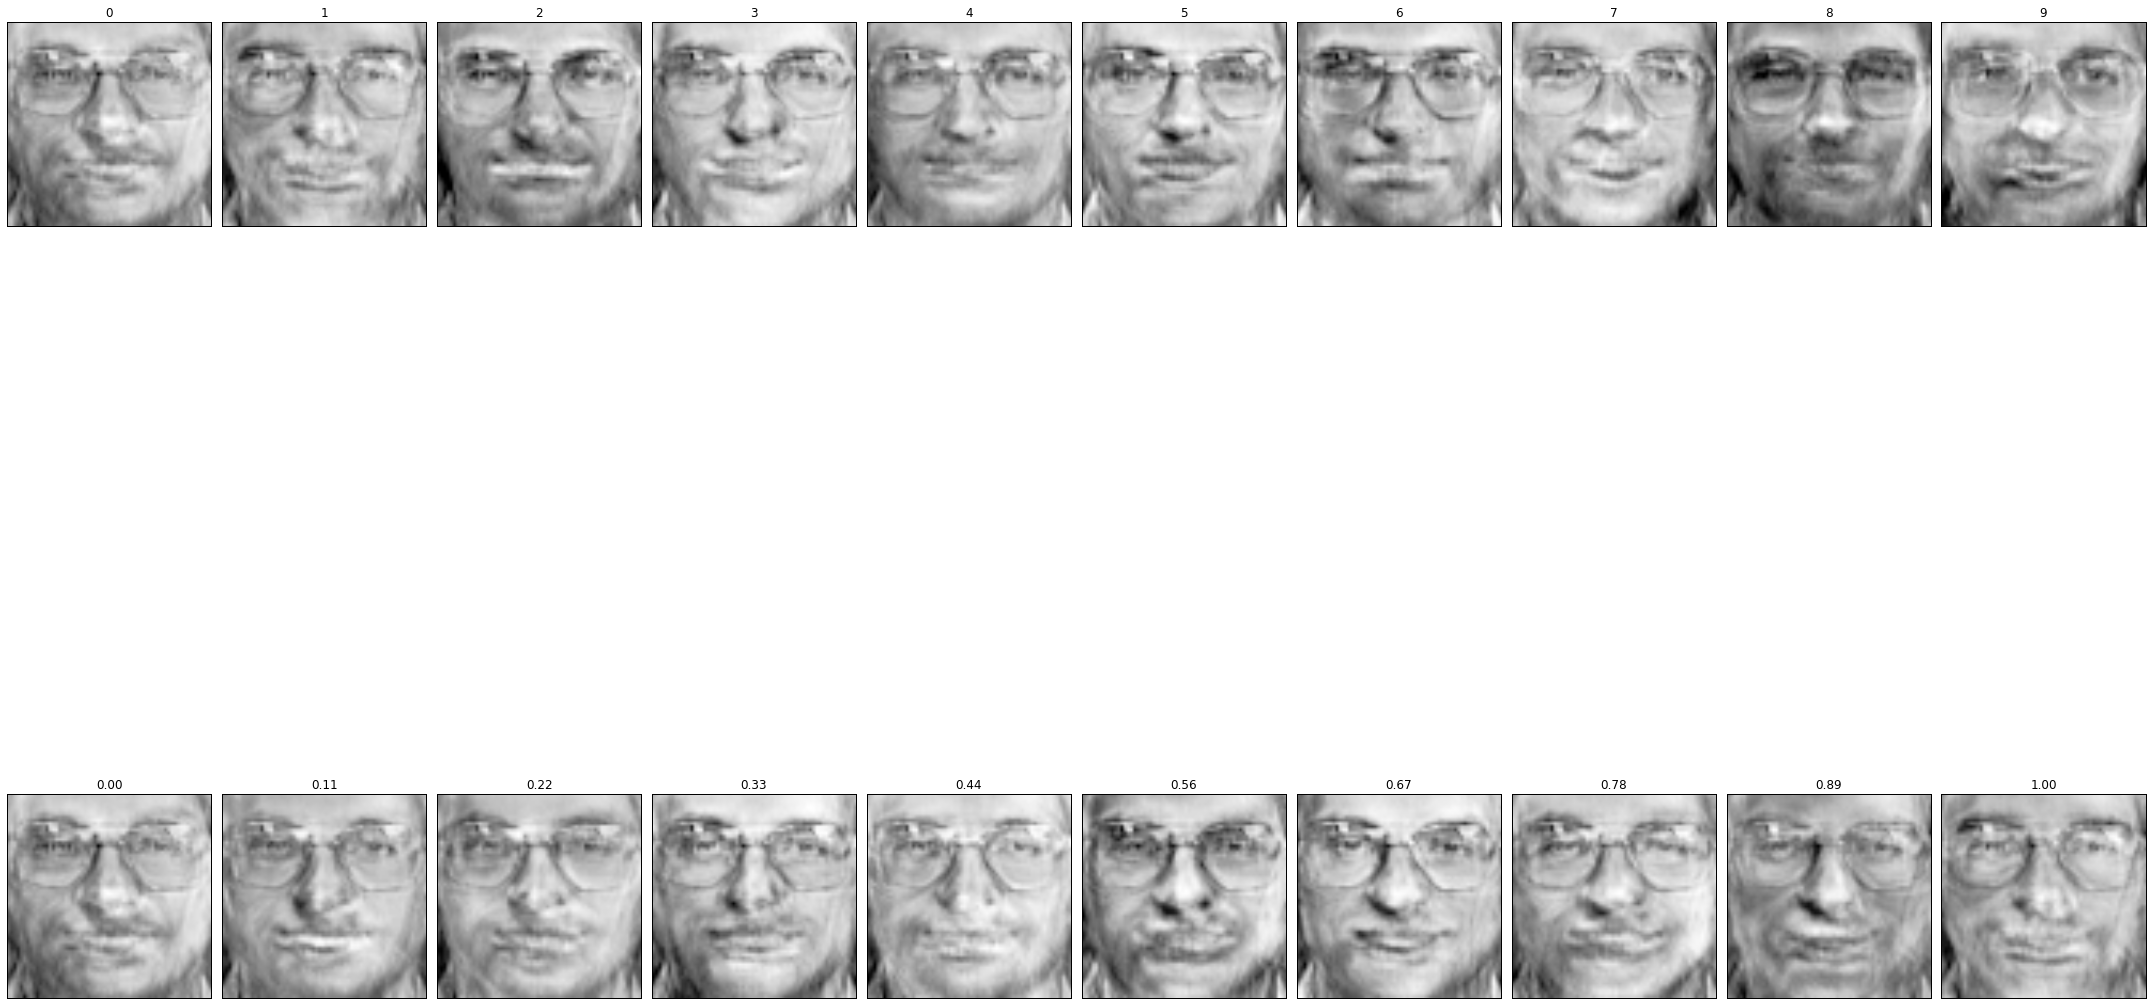

Epoch 50
Epoch 51
Epoch 52


KeyboardInterrupt: 

In [2]:
%matplotlib inline

# %load faceslabeled.py
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from util import get_olivetti_faces, ImageExperiment
from gsdr import GSDRStack

np.random.seed(123)

# Get the data
data, target = get_olivetti_faces()
print("Data Shape:", data.shape)
print("Target Shape:", target.shape)
input_size = (64, 64)
input_count = data.shape[1]

# Create the network
hidden_count = 400
print("Hidden count:", hidden_count)

forced_latent_count = 40

gsdr = GSDRStack()
gsdr.add(input_count=input_count, hidden_count=hidden_count, sparsity=0.30)
gsdr.add(hidden_count=hidden_count, sparsity=0.25)
gsdr.add(hidden_count=hidden_count, sparsity=0.20)
gsdr.add(hidden_count=hidden_count, sparsity=0.15)
gsdr.add(hidden_count=hidden_count, sparsity=0.1, forced_latent_count=forced_latent_count)

last_layer_index = len(gsdr._layers)-1
face_forced_latents = np.eye(forced_latent_count)
forced_latents = [{last_layer_index: face_forced_latents[target[i]]} for i in range(data.shape[0])]

def plot(exp):
    f, ax = plt.subplots(2, 10)

    f.set_size_inches(30, 30)

    # Generate all faces from 0 to 10
    for j in range(10):
        generated = exp.gsdr.generate(forced_latents={last_layer_index: face_forced_latents[j]})
        generated = (255 * np.clip(generated, 0, 1).reshape(input_size)).astype(np.uint8)
        img = Image.fromarray(generated)
        ax[0, j].imshow(img, cmap='Greys_r')
        ax[0, j].set_title(str(j))
        ax[0, j].axes.get_xaxis().set_visible(False)
        ax[0, j].axes.get_yaxis().set_visible(False)

    # Interpolate between 0 and 1
    for j in range(10):
        latent = j / 9 * face_forced_latents[1] + (1 - j / 9) * face_forced_latents[0]
        generated = exp.gsdr.generate(forced_latents={last_layer_index: latent})
        generated = (255 * np.clip(generated, 0, 1).reshape(input_size)).astype(np.uint8)
        img = Image.fromarray(generated)
        ax[1, j].imshow(img, cmap='Greys_r')
        ax[1, j].set_title("%.2f" % (j / 9))
        ax[1, j].axes.get_xaxis().set_visible(False)
        ax[1, j].axes.get_yaxis().set_visible(False)

    plt.tight_layout()
    plt.show()

exp = ImageExperiment(gsdr, data, input_size, epochs=1000, target=target, plot_func=plot, forced_latents=forced_latents, plot_iters=4000, learn_rate=0.01)
exp.run()
